## Universidad Autonoma de Aguascalientes
## Departamento: Ciencias de La Computación
## Carrera: Ingenieria en Computación Inteligente
### Curso: Lenguajes Inteligentes
### Maestro: Dr. Francisco Javier Luna Rosas
### Alumnos: Martin Isai Nuñez Villeda
###          Paola Montserrat Osorio García
###          Oscar Jovany Flores Robledo
### Semestre: Agosto_Diciembre del 2025

## Uso de Inteligencia Artificial para la clasificacion de imagenes y susu canales de color (r,g,b) o sin modificar
## #La clasificacion de imagenes y el uso de redes neuronales son dos practicas muy relacionades y comunmente aplicadas en varios campos de la ciencia.

## Se importa cv2 para el almacenado y manipulacion de imagenes dentro de la funcion preparar_dataset se cargan las imagenes de un dataset previamente descargado y se crea un directorio segun sea el caso (test y train) ya que el data set original se separara en un 70/30 (70% entrenamiento 30% testeo)
## El proceso de preparacion del data set es el siguiente: a las imagenes se les extraera el canal rgb mediante open cv y se guardaran en carpetas subyacentes correspondiente al canal que sea (rojo,azul,verde,original).

In [2]:
import cv2
import os
import numpy as np
import random

def preparar_dataset(origen, destino_base):
    extensiones_validas = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')

    
    clases = ['rojo', 'verde', 'azul', 'original']
    for clase in clases:
        os.makedirs(os.path.join(destino_base, 'train', clase), exist_ok=True)
        os.makedirs(os.path.join(destino_base, 'test', clase), exist_ok=True)

    
    imagenes = [f for f in os.listdir(origen) if f.lower().endswith(extensiones_validas)]
    random.shuffle(imagenes)

    # División 
    limite_train = int(len(imagenes) * 0.7)
    imagenes_train = imagenes[:limite_train]
    imagenes_test = imagenes[limite_train:]

 
    def procesar_imagenes(lista, tipo):
        for archivo in lista:
            ruta = os.path.join(origen, archivo)
            imagen = cv2.imread(ruta)
            if imagen is None:
                print(f" No se pudo leer: {archivo}")
                continue

           
            b, g, r = cv2.split(imagen)
            base_nombre = os.path.splitext(archivo)[0]

          
            img_roja = cv2.merge([np.zeros_like(b), np.zeros_like(g), r])
            img_verde = cv2.merge([np.zeros_like(b), g, np.zeros_like(r)])
            img_azul = cv2.merge([b, np.zeros_like(g), np.zeros_like(r)])

         
            cv2.imwrite(os.path.join(destino_base, tipo, 'rojo', f"{base_nombre}_R.jpg"), img_roja)
            cv2.imwrite(os.path.join(destino_base, tipo, 'verde', f"{base_nombre}_G.jpg"), img_verde)
            cv2.imwrite(os.path.join(destino_base, tipo, 'azul', f"{base_nombre}_B.jpg"), img_azul)
            cv2.imwrite(os.path.join(destino_base, tipo, 'original', f"{base_nombre}_O.jpg"), imagen)

            print(f" Procesada {archivo} -> {tipo}")

   
    procesar_imagenes(imagenes_train, 'train')
    procesar_imagenes(imagenes_test, 'test')

    print("\n Dataset preparado correctamente.")
    print(f"Total entrenamiento: {len(imagenes_train)} | Total prueba: {len(imagenes_test)}")


if __name__ == "__main__":
    carpeta_origen = "./IMGS"   
    carpeta_salida = "./DATA_S"    
    preparar_dataset(carpeta_origen, carpeta_salida)


 Procesada n04111531_rotisserie.JPEG -> train
 Procesada n03729826_matchstick.JPEG -> train
 Procesada n01530575_brambling.JPEG -> train
 Procesada n04081281_restaurant.JPEG -> train
 Procesada n04209239_shower_curtain.JPEG -> train
 Procesada n01944390_snail.JPEG -> train
 Procesada n03201208_dining_table.JPEG -> train
 Procesada n01739381_vine_snake.JPEG -> train
 Procesada n04141975_scale.JPEG -> train
 Procesada n04356056_sunglasses.JPEG -> train
 Procesada n02445715_skunk.JPEG -> train
 Procesada n04275548_spider_web.JPEG -> train
 Procesada n03089624_confectionery.JPEG -> train
 Procesada n01753488_horned_viper.JPEG -> train
 Procesada n04366367_suspension_bridge.JPEG -> train
 Procesada n02102480_Sussex_spaniel.JPEG -> train
 Procesada n01632458_spotted_salamander.JPEG -> train
 Procesada n02916936_bulletproof_vest.JPEG -> train
 Procesada n02138441_meerkat.JPEG -> train
 Procesada n02971356_carton.JPEG -> train
 Procesada n02091635_otterhound.JPEG -> train
 Procesada n01616318_

## Se carga el data set ya creado para el entrenamiento se determina el tamaño de la entrada(64*64 para que sea manejable) y se plantea las epocas y en no de transiciones, se ondica donde y como encontrar los dataset de train y test para entre3nar o validar segun sea el caso y finalmente se indica la definicion del modelo.
## Usamos un tipo de activacion relu(pq asi venia en la documentacion nlg) y de mode class  el categorico para la clasificacion
## Se define que se sabe que hay 4 clasificaciones conocidas se le indica al modelo ademsa de numero de capas y pooling
## Se compila y entrena el modelo
## Se guarda el modelo
## Se muestran la precision y perdida de esta a lo largo del entrenamiento

Found 3836 images belonging to 4 classes.
Found 2208 images belonging to 4 classes.


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 116s 947ms/step - accuracy: 0.9836 - loss: 0.0415 - val_accuracy: 0.9995 - val_loss: 0.0025
Epoch 2/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 326ms/step - accuracy: 0.9995 - loss: 0.0034 - val_accuracy: 0.9986 - val_loss: 0.0100
Epoch 3/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 329ms/step - accuracy: 0.9948 - loss: 0.0276 - val_accuracy: 0.9986 - val_loss: 0.0099
Epoch 4/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 323ms/step - accuracy: 0.9995 - loss: 0.0020 - val_accuracy: 0.9995 - val_loss: 0.0012
Epoch 5/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 324ms/step - accuracy: 0.9997 - loss: 8.3513e-04 - val_accuracy: 0.9968 - val_loss: 0.0090
Epoch 6/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 336ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.9995 - val_loss: 0.0035
Epoch 7/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 339ms/step - accuracy: 0.9997 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 3.7140e-04
Epoch 8/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 343ms/step - accuracy: 1.0000 


✅ Modelo guardado como modelo_colores.h5


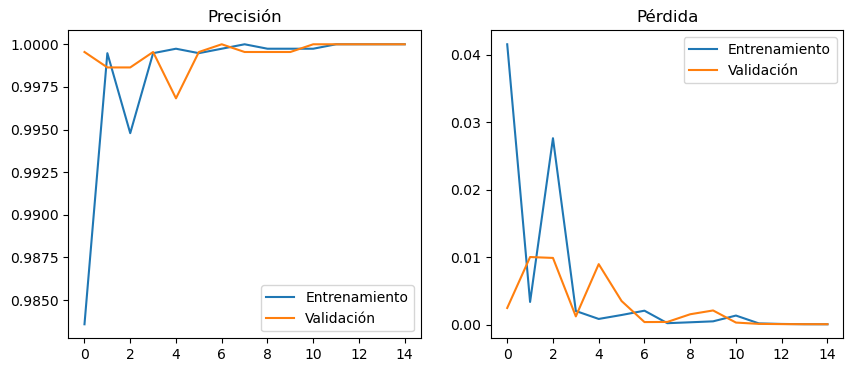

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# --- Configuración ---
ruta_dataset = "./DATA_S"  
img_size = (64, 64)   # Tamaño de entrada
batch_size = 32
epochs = 15

# --- Generadores de datos ---
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    f"{ruta_dataset}/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    f"{ruta_dataset}/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# --- Definición del modelo tipo perceptrón multicapa (MLP) ---
model = models.Sequential([
    layers.Flatten(input_shape=(img_size[0], img_size[1], 3)),  # Aplanar la entrada (64x64x3)
    layers.Dense(32, activation='sigmoid'),  # Capa oculta con 32 neuronas y activación sigmoide
    layers.Dense(16, activation='sigmoid'),  # Capa oculta con 16 neuronas y activación sigmoide
    layers.Dense(4, activation='softmax')   # Capa de salida con 4 clases
])

# --- Compilación ---
model.compile(
    optimizer=Adam(learning_rate=0.01),  # Optimizador Adam con una tasa de aprendizaje más alta
    loss='categorical_crossentropy',     # Función de pérdida para clasificación multiclase
    metrics=['accuracy']                 # Métrica de precisión
)

# --- Entrenamiento ---
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=test_data
)

# --- Guardar el modelo ---
model.save("modelo_perceptron_colores.h5")
print("\n✅ Modelo guardado como modelo_perceptron_colores.h5")

# --- Gráficas de resultados ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.legend()
plt.show()


In [ ]:
#

## Se configura un modelo de prueba sus entradas ( de 64*64) se carga el modelo, se indica la ruta de las imagenes de testeo para probar la presicion y obtener la matriz de confusion -> hacemos uso de las matrices de confusion de sklearn para ahorrarnos trabajo y se vea bonito y ademas imprimimos las presiciones obtenidas en texto plano

Found 2208 images belonging to 4 classes.


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


69/69 ━━━━━━━━━━━━━━━━━━━━ 15s 222ms/step


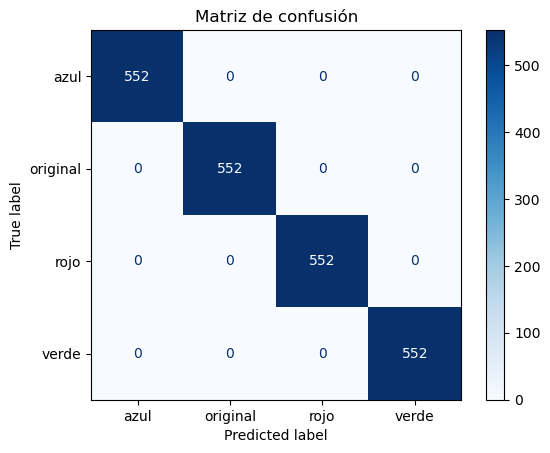


 Reporte de clasificación:
              precision    recall  f1-score   support

        azul       1.00      1.00      1.00       552
    original       1.00      1.00      1.00       552
        rojo       1.00      1.00      1.00       552
       verde       1.00      1.00      1.00       552

    accuracy                           1.00      2208
   macro avg       1.00      1.00      1.00      2208
weighted avg       1.00      1.00      1.00      2208



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 
ruta_dataset = "./DATA_S"  
img_size = (64, 64)
batch_size = 32

#cargar modelo 
model = load_model("./modelo_perceptron_colores.h5")


test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow_from_directory(
    f"{ruta_dataset}/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

#predicciones
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes
class_labels = list(test_data.class_indices.keys())

#  matriz de confusio
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.show()

# reporte de precision 
print("\n Reporte de clasificación:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


# Se incluye una interfaz grafica con tinker (sencilla) que abre el explorador de archivos para seleccionar una imagen y la red realize una prediccion segun el modelo. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


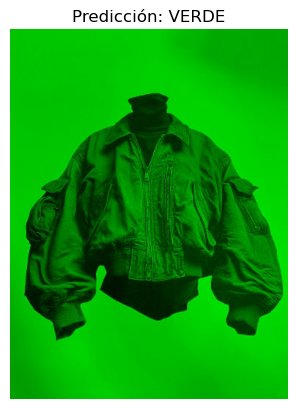

 Clasificación: verde
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


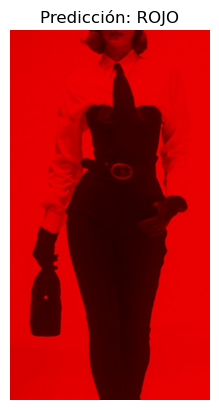

 Clasificación: rojo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


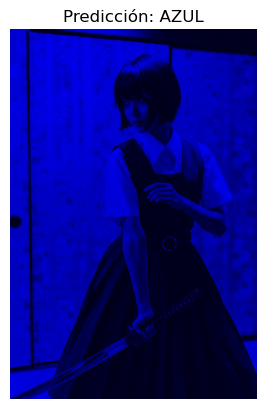

 Clasificación: azul
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


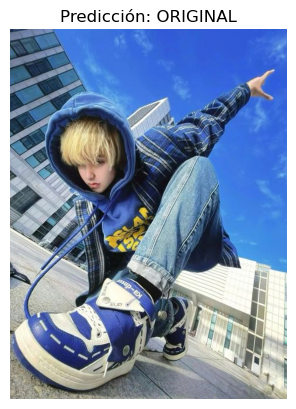

 Clasificación: original
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


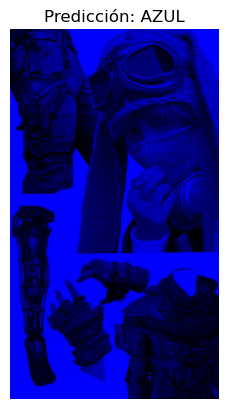

 Clasificación: azul
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


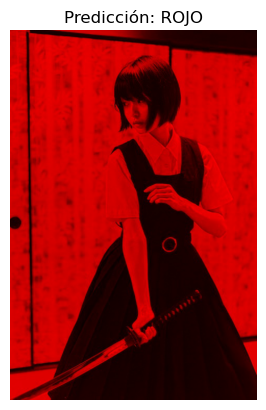

 Clasificación: rojo
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


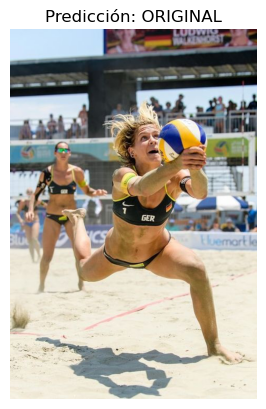

 Clasificación: original


In [ ]:
import tkinter as tk
from tkinter import filedialog
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from PIL import Image


model = load_model("modelo_perceptron_colores.h5")


clases = ['azul', 'original', 'rojo', 'verde']


def clasificar_imagen():
    ruta = filedialog.askopenfilename(
        title="Selecciona una imagen",
        filetypes=[("Archivos de imagen", "*.jpg *.jpeg *.png *.bmp *.tiff")]
    )
    if not ruta:
        print(" No se seleccionó ninguna imagen.")
        return

    try:
        
        img_pil = Image.open(ruta).convert("RGB")
        img_rgb = np.array(img_pil)
        img_resized = cv2.resize(img_rgb, (64, 64))
        img_array = np.expand_dims(img_resized / 255.0, axis=0)

        pred = model.predict(img_array)
        clase = clases[np.argmax(pred)]

        plt.imshow(img_rgb)
        plt.title(f"Predicción: {clase.upper()}")
        plt.axis("off")
        plt.show()

        print(f" Clasificación: {clase}")

    except Exception as e:
        print(f" Error al procesar la imagen: {e}")


# UI
ventana = tk.Tk()
ventana.title("Clasificador de colores")
ventana.geometry("300x200")

boton = tk.Button(ventana, text="Seleccionar imagen", command=clasificar_imagen, font=("Arial", 12))
boton.pack(pady=60)

ventana.mainloop()


# Referencias 
## Web -Opencv Documentation(Opencv org 2020) https://opencv.org/university/free-opencv-course/?utm_source=opcv&utm_medium=menu&utm_campaign=obc
## Video- Convolutional Neural Networks Explained (CNN Visualized)(Futoralogy explained 2020) https://www.youtube.com/watch?v=pj9-rr1wDhM
## What is a Neural Network? (geekforgeeks 2025) https://www.geeksforgeeks.org/machine-learning/neural-networks-a-beginners-guide
## TensorFLow Documentation (TensorFlow 2024) https://www.tensorflow.org/api_docs